In [1]:
%pylab inline
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Populating the interactive namespace from numpy and matplotlib


In [2]:
Y00_Y08_5features = np.load('/disk1/pore_data/NanoporeTERs/Y00_Y08_5features_4149examples.npy','r')
Y00_Y08_classes = np.load('/disk1/pore_data/NanoporeTERs/Y00_Y08_classes_4149examples.npy','r')
Homopol_12aa_5features = np.load('/disk1/pore_data/NanoporeTERs/Homopolymer_12aa_5features_1569examples.npy','r')
Homopol_12aa_classes = np.load('/disk1/pore_data/NanoporeTERs/Homopolymer_12aa_classes_1569examples.npy','r')
Y0to8_Homopol_12aa_5features = np.load('/disk1/pore_data/NanoporeTERs/Y0to8_Homopol_12aa_5features_1569examples.npy','r')
Y0to8_Homopol_12aa_classes = np.load('/disk1/pore_data/NanoporeTERs/Y0to8_Homopol_12aa_classes_1569examples.npy','r')


# Y0toY8_12aa

In [3]:
X_data = Y00_Y08_5features
y_data = Y00_Y08_classes

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)

In [4]:
random_forest = RandomForestClassifier(n_estimators=300, max_depth=100)
random_forest.fit(X_train, y_train)

/homes/gws/kdorosch/software/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [5]:
y_predict = random_forest.predict(X_test)
print accuracy_score(y_test, y_predict)

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08'],
    index=['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08'])

0.9143101970865467


,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08
Y00,956,12,8,0,3,4,1,8,25
Y01,22,1033,17,2,2,0,4,4,6
Y02,7,24,986,25,14,8,2,1,4
Y03,7,0,23,977,30,5,1,0,1
Y04,20,12,23,39,861,35,8,14,9
Y05,17,3,11,5,52,932,3,7,4
Y06,2,6,11,8,12,29,965,15,15
Y07,16,2,6,1,8,7,7,940,19
Y08,38,4,5,9,9,8,12,19,886


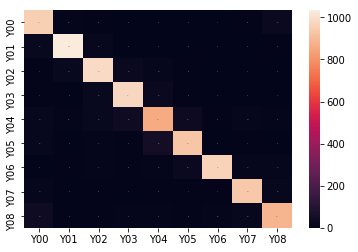

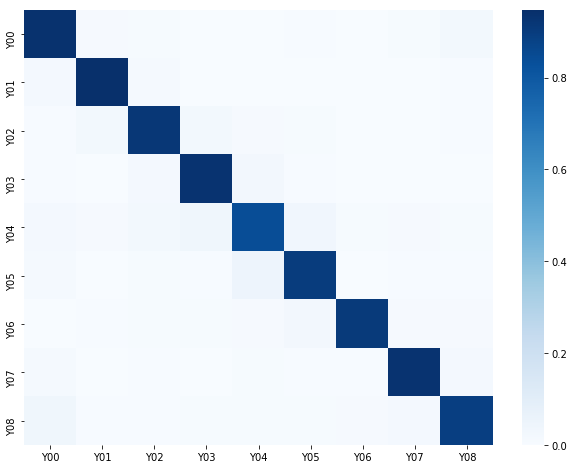

Feature ranking:
1. feature 4 (0.305985)
2. feature 0 (0.247703)
3. feature 1 (0.229031)
4. feature 3 (0.164454)
5. feature 2 (0.052828)


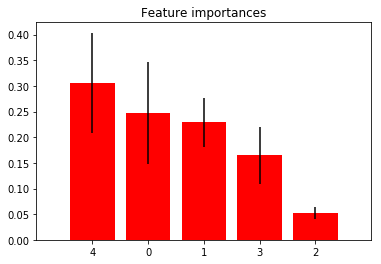

In [6]:
df = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08'],
    index=['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08'])

sns.heatmap(df, annot=True, annot_kws={'size': 1}, fmt='g')
plt.show()


plt.figure(figsize=(10.5, 8))
df_norm_col = df.div(df.sum(axis=1), axis=0)
sns.heatmap(df_norm_col, cmap='Blues')
plt.savefig('/disk1/pore_data/NanoporeTERs/Figures/ConfusionMatrix_Y0toY8_12aa.svg')
plt.show()


importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Homopol_12aa

In [7]:
X_data = Homopol_12aa_5features
y_data = Homopol_12aa_classes

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)

In [8]:
random_forest = RandomForestClassifier(n_estimators=300, max_depth=100)
random_forest.fit(X_train, y_train)

/homes/gws/kdorosch/software/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
y_predict = random_forest.predict(X_test)
print accuracy_score(y_test, y_predict)


pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['A','D','E','G','H','M','N','P','Q','R','S','T'],
    index=['A','D','E','G','H','M','N','P','Q','R','S','T'])

0.7697046951349055


,A,D,E,G,H,M,N,P,Q,R,S,T
A,224,3,0,3,13,132,7,5,7,5,0,3
D,1,316,6,7,6,2,2,3,2,5,0,1
E,2,15,320,2,6,0,14,5,1,3,2,8
G,3,2,3,325,5,2,2,0,0,39,11,4
H,7,4,5,12,355,15,2,1,3,18,3,4
M,125,3,1,2,20,181,4,11,8,8,3,2
N,0,2,5,1,5,2,302,30,34,1,4,2
P,8,1,4,3,5,13,32,274,15,4,1,9
Q,6,3,0,2,3,11,46,10,326,6,2,9
R,0,4,5,22,4,7,4,2,7,325,2,3


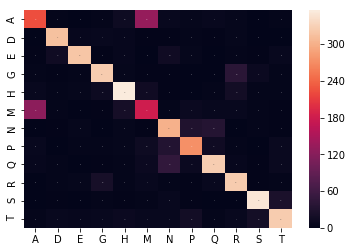

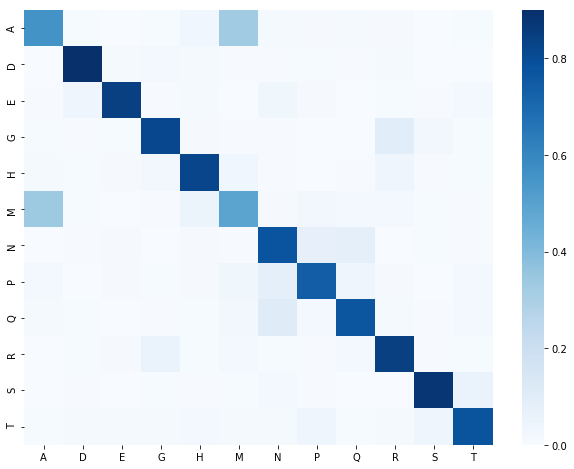

Feature ranking:
1. feature 4 (0.235701)
2. feature 3 (0.216853)
3. feature 1 (0.209275)
4. feature 0 (0.201251)
5. feature 2 (0.136920)


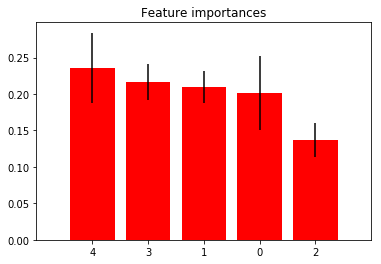

In [10]:
df = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['A','D','E','G','H','M','N','P','Q','R','S','T'],
    index=['A','D','E','G','H','M','N','P','Q','R','S','T'])

sns.heatmap(df, annot=True, annot_kws={'size':1}, fmt='g')
plt.show()

plt.figure(figsize = (10.5,8))

df_norm_col = df.div(df.sum(axis=1), axis=0)
sns.heatmap(df_norm_col, cmap='Blues')

plt.savefig('/disk1/pore_data/NanoporeTERs/Figures/ConfusionMatrix_Homopol_12aa.svg')

plt.show()

importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Y0to8_Homopol_12aa

In [11]:
X_data = Y0to8_Homopol_12aa_5features
y_data = Y0to8_Homopol_12aa_classes

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)

In [12]:
random_forest = RandomForestClassifier(n_estimators=300, max_depth=100)
random_forest.fit(X_train, y_train)

/homes/gws/kdorosch/software/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
y_predict = random_forest.predict(X_test)
print accuracy_score(y_test, y_predict)

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08','A','D','E','G','H','M','N','P','Q','R','S','T'],
    index=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08','A','D','E','G','H','M','N','P','Q','R','S','T']
)

0.8055970946378979


,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,A,...,E,G,H,M,N,P,Q,R,S,T
Y00,872,9,1,1,4,1,1,6,21,0,...,11,22,9,4,1,1,0,23,5,14
Y01,12,968,18,3,0,1,4,3,4,4,...,2,5,3,3,1,2,0,0,2,12
Y02,4,24,931,19,7,8,1,0,1,8,...,0,1,19,27,6,0,5,5,0,6
Y03,2,2,15,925,23,3,1,0,2,15,...,1,2,9,7,3,1,7,4,0,0
Y04,15,1,8,44,841,29,6,4,5,11,...,3,0,10,5,9,8,26,11,2,1
Y05,4,2,5,4,42,867,9,3,2,3,...,1,2,1,2,30,1,31,5,1,0
Y06,0,1,5,5,12,25,924,6,11,0,...,2,1,3,4,11,10,5,1,1,3
Y07,14,2,3,1,1,5,8,908,13,0,...,4,2,2,1,4,14,2,6,2,11
Y08,21,3,7,7,2,4,8,12,859,3,...,8,11,5,4,4,1,1,7,44,6
A,1,1,18,39,2,4,0,1,2,200,...,0,1,8,91,5,1,3,3,0,1


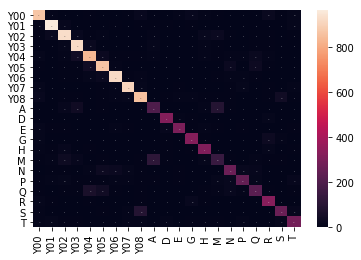

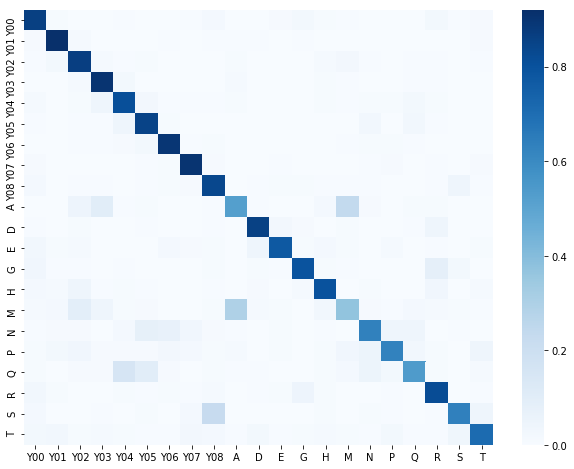

Feature ranking:
1. feature 4 (0.246380)
2. feature 1 (0.226071)
3. feature 0 (0.211926)
4. feature 3 (0.210681)
5. feature 2 (0.104942)


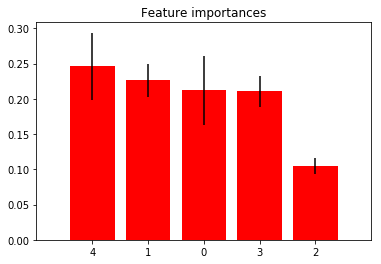

In [14]:
df = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08','A','D','E','G','H','M','N','P','Q','R','S','T'],
    index=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08','A','D','E','G','H','M','N','P','Q','R','S','T'])

sns.heatmap(df, annot=True, annot_kws={'size':1}, fmt='g')
plt.show()

plt.figure(figsize = (10.5,8))
df_norm_col = df.div(df.sum(axis=1), axis=0)
sns.heatmap(df_norm_col, cmap='Blues')
plt.savefig('/disk1/pore_data/NanoporeTERs/Figures/ConfusionMatrix_Y0toY8_Homopol_12aa.svg')
plt.show()

importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

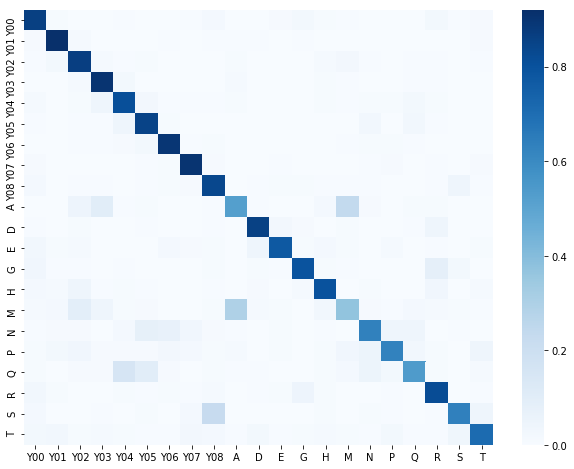

In [15]:
plt.figure(figsize = (10.5,8))

df_norm_col = df.div(df.sum(axis=1), axis=0)
sns.heatmap(df_norm_col, cmap='Blues')
plt.show()